<a href="https://colab.research.google.com/github/zainnabtarrek/Machine-learning-algorithms-from-scratch/blob/main/My_KNeighborsClassifier_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the KNN (k-Nearest Neighbors) algorithm to solve a classification problem

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

Loading the Iris Dataset & Naming the data

In [ ]:
dataset = load_iris()
iris_df = pd.DataFrame(data=dataset.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(iris_df)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


Adds a new column 'species'=Target

In [ ]:
iris_df['species'] = dataset.target_names[dataset.target]
print(iris_df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


Print the first 5 rows

In [ ]:
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Values in the 'species' column are transformed from categorical values into numerical labels.

In [ ]:
label_encoder = LabelEncoder()
iris_df['species'] = label_encoder.fit_transform(iris_df['species'])
print(iris_df)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


Scatter plots  (show each class in a different color)

`sepal_width` vs `sepal_length`

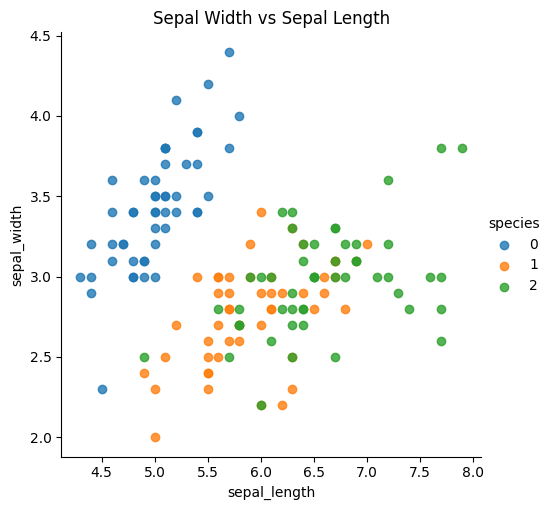

In [ ]:
sns.lmplot(x='sepal_length', y='sepal_width', data=iris_df, hue='species', fit_reg=False)
plt.title('Sepal Width vs Sepal Length')
plt.show()

`petal_width` vs `petal_length`

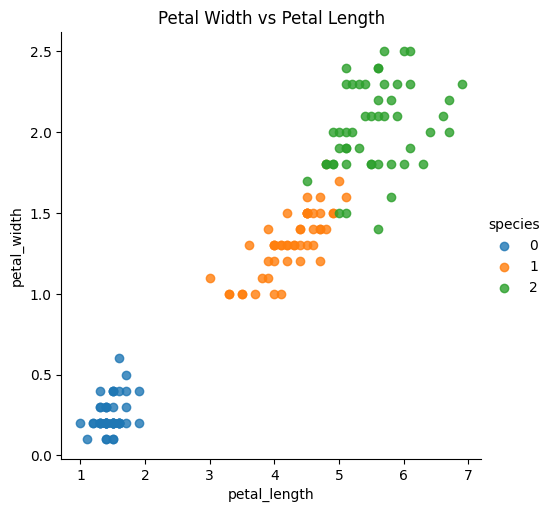

In [ ]:
sns.lmplot(x='petal_length', y='petal_width', data=iris_df, hue='species', fit_reg=False)
plt.title('Petal Width vs Petal Length')
plt.show()

Prepare the data for classification
Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit.

In [ ]:
X=iris_df.drop(columns=['species'])
y =iris_df[['species']].values.ravel()

Split the data into `train` and `test` using `sklearn` `train_test_split` function.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [ ]:
X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)

Euclidean Distance

In [ ]:
def euclidean_distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2)**2))

Manhatten Distance

In [ ]:
def manhattan_distance(point1, point2):
 return np.sum(np.abs(point1 - point2))

Cosine Similarity

In [ ]:
def cosine_similarity(x,y):
  dot_product = np.dot(x,y)
  X_norm = np.linalg.norm(x)
  Y_norm = np.linalg.norm(y)
  return dot_product / (X_norm * Y_norm)

KNeighborsClassifier from scratch using the 3 distance Functions



In [ ]:
def KNeighborsClassifier (X_train, y_train, X_test, k=3, distance_type='euclidean'):
  def calculate_distance(x1,x2):
    if distance_type == 'euclidean':
      return euclidean_distance(x1,x2)
    elif distance_type == 'manhattan':
      return manhattan_distance(x1,x2)
    elif distance_type == 'cosine':
      return 1-cosine_similarity(x1,x2)
    else:
      raise ValueError("Unsupported distance type. Use 'euclidean', 'manhattan', or 'cosine'.")
  predictions = []
  for x_test in X_test:
    # 1.Calculate the distance
    distances = [calculate_distance(x_test, x_train) for x_train in X_train]
    # 2.Sort them to get the indices with the K smallest distances
    K_indices = np.argsort(distances)[:k]
    # 3.Get the labels of the K nearest neighbors
    K_nearest_labels = [y_train[i] for i in K_indices]
    # 4.Determine the most frequent label among the nearest neighbors
    major = Counter(K_nearest_labels).most_common(1)[0][0]
    predictions.append(major)

  return np.array(predictions)

In cosine similarity:
we need to minimize the angle to maximize its similarity
so we used 1- to find the nearest vector in the point of view of the angle : )

Use the learning model to predict the class from features, run prediction on `X` from test part

*Predict the classes using the KNeighborsClassifier function with the 3 different distance measures*

In [ ]:
y_pred_euclidean = KNeighborsClassifier(X_train, y_train, X_test, k=3, distance_type='euclidean')

accuracy_test = accuracy_score(y_test, y_pred_euclidean)
print("Accuracy of KNN using Euclidean: {:.2f}%".format(accuracy_test * 100))

correct_predictions_test = np.sum(y_test == y_pred_euclidean)
incorrect_predictions_test = len(y_test) - correct_predictions_test

print("Correct Predictions:", correct_predictions_test)
print("Incorrect Predictions:", incorrect_predictions_test)

Accuracy of KNN using Euclidean: 100.00%
Correct Predictions: 30
Incorrect Predictions: 0


In [ ]:
y_pred_manhattan = KNeighborsClassifier(X_train, y_train, X_test, k=3, distance_type='manhattan')

accuracy_test = accuracy_score(y_test, y_pred_manhattan)
print("Accuracy of KNN using Manhattan: {:.2f}%".format(accuracy_test * 100))

correct_predictions_test = np.sum(y_test == y_pred_manhattan)
incorrect_predictions_test = len(y_test) - correct_predictions_test

print("Correct Predictions:", correct_predictions_test)
print("Incorrect Predictions:", incorrect_predictions_test)

Accuracy of KNN using Manhattan: 100.00%
Correct Predictions: 30
Incorrect Predictions: 0


In [ ]:
y_pred_cosine = KNeighborsClassifier(X_train, y_train, X_test, k=3, distance_type='cosine')

accuracy_test = accuracy_score(y_test, y_pred_cosine)
print("Accuracy of KNN using Cosine Similarity: {:.2f}%".format(accuracy_test * 100))

correct_predictions_test = np.sum(y_test == y_pred_cosine)
incorrect_predictions_test = len(y_test) - correct_predictions_test

print("Correct Predictions:", correct_predictions_test)
print("Incorrect Predictions:", incorrect_predictions_test)

Accuracy of KNN using Cosine Similarity: 96.67%
Correct Predictions: 29
Incorrect Predictions: 1


Confusion Matrix from scratch

In [ ]:
def confusion_matrix(actual, predicted, classes):
    num_classes = len(classes)
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(num_classes):
        for j in range(num_classes):
            conf_matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))


    return conf_matrix

In [ ]:
classes = iris_df['species'].unique()

conf_matrix = confusion_matrix(y_test, y_pred_euclidean, classes)

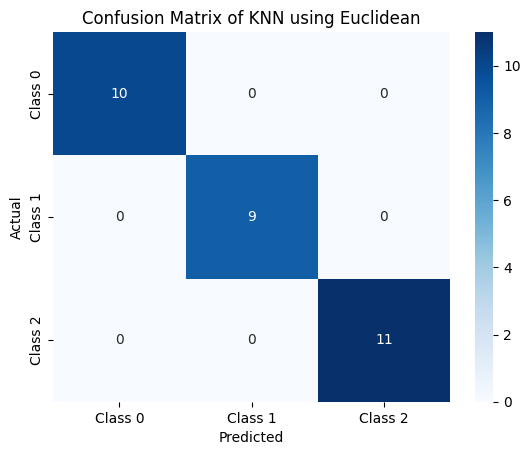

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.title('Confusion Matrix of KNN using Euclidean')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
classes = iris_df['species'].unique()

conf_matrix1 = confusion_matrix(y_test, y_pred_manhattan, classes)

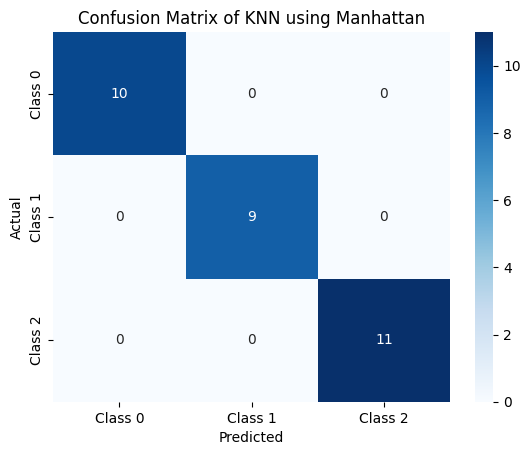

In [ ]:
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.title('Confusion Matrix of KNN using Manhattan')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
classes = iris_df['species'].unique()

conf_matrix2 = confusion_matrix(y_test, y_pred_cosine, classes)

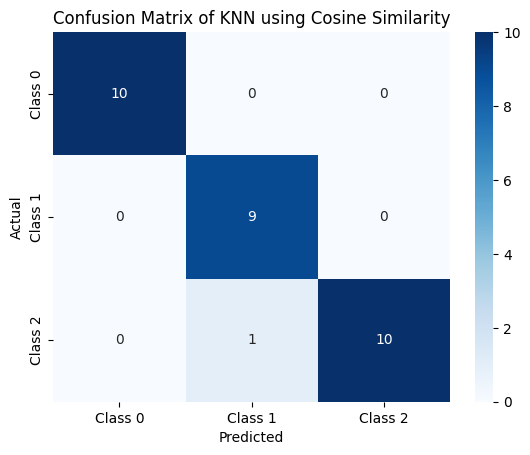

In [ ]:
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.title('Confusion Matrix of KNN using Cosine Similarity')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

F1 score

In [ ]:
f1_score_euclidean = f1_score(y_test, y_pred_euclidean,average=None)
print("F1 Score (Euclidean):")
print("- Class 0:", f1_score_euclidean[0])
print("- Class 1:", f1_score_euclidean[1])
print("- Class 2:", f1_score_euclidean[2])

f1_score_manhattan = f1_score(y_test, y_pred_manhattan, average=None)
print("\nF1 Score (Manhattan):")
print("- Class 0:", f1_score_manhattan[0])
print("- Class 1:", f1_score_manhattan[1])
print("- Class 2:", f1_score_manhattan[2])

f1_score_cosine = f1_score(y_test, y_pred_cosine, average=None)
print("\nF1 Score (Cosine Similarity):")
print("- Class 0:", f1_score_cosine[0])
print("- Class 1:", f1_score_cosine[1])
print("- Class 2:", f1_score_cosine[2])


F1 Score (Euclidean):
- Class 0: 1.0
- Class 1: 1.0
- Class 2: 1.0

F1 Score (Manhattan):
- Class 0: 1.0
- Class 1: 1.0
- Class 2: 1.0

F1 Score (Cosine Similarity):
- Class 0: 1.0
- Class 1: 0.9473684210526316
- Class 2: 0.9523809523809523
